# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

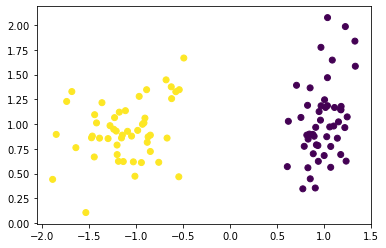

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [3]:
def loss_func(x):
    return 0 if x > 0 else 1

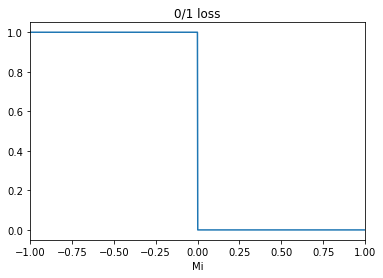

In [4]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [5]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [6]:
def exp_func(x):
    return np.exp(-x)

In [7]:
def square_loss(x):
    return (1 - x)**2

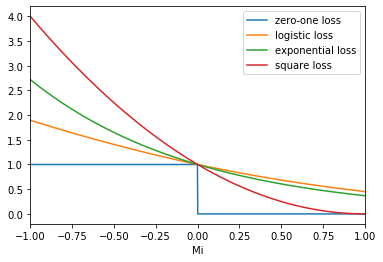

In [8]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [12]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [13]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [14]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [15]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [16]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

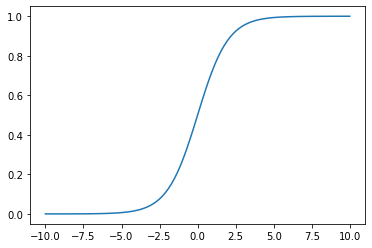

In [19]:
plt.plot(z, p);

In [109]:
def logreg_eval_model(X, y, iterations, alpha=1e-4, verbose=True):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if verbose:
            if i % (iterations/10) ==0:
                print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [115]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159981, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


### Домашнее задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [79]:
def calc_logloss(y, y_pred):
    if any((y_pred == 0)) or any((y_pred == 1)) :
        return np.inf # но это не верно. надо бы эти значения отдельно обработать, но пока не придумал как именно.
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [89]:
calc_logloss(np.array([1, 0 , 0, 1, 0.5]), np.array([0.9, 0.1, 0, 1, 0.4]))

inf

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [116]:
W = logreg_eval_model(X_st, y, iterations=30000, alpha=0.99) # странные результаты. Веса небольшие, переобучились?

итерация: 3000, logloss: 0.18185086554214386, веса: [-20.18922313  -2.21154787  -5.08376339  16.71092611]
итерация: 6000, logloss: 0.14106239004697485, веса: [-28.4419507   -2.93822934  -7.49914911  23.39786902]
итерация: 9000, logloss: 0.12142833275404555, веса: [-34.20672086  -3.44650917  -9.16184159  28.04961271]
итерация: 12000, logloss: 0.10953262058759686, веса: [-38.7109117   -3.83938678 -10.45516767  31.66645702]
итерация: 15000, logloss: 0.10132140661950464, веса: [-42.4635479   -4.16131825 -11.53278605  34.66406562]
итерация: 18000, logloss: 0.09516461947161872, веса: [-45.72071057  -4.43517827 -12.47042776  37.25180457]
итерация: 21000, logloss: 0.09027984199020331, веса: [-48.62819893  -4.67422913 -13.31056188  39.54907414]
итерация: 24000, logloss: 0.08624351511072034, веса: [-51.27642614  -4.88685416 -14.07918434  41.63011256]
итерация: 27000, logloss: 0.0828055547602388, веса: [-53.72504248  -5.07871502 -14.79323211  43.54409518]
итерация: 30000, logloss: inf, веса: [-56

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba)

In [117]:
W.dot(X)

array([ -7748.07420819, -10840.92632455, -11574.06799224,  -9294.50026637,
       -22404.30424063, -12382.09854163, -23142.69974942, -30901.09924587,
        -6974.86117909, -15440.1331377 ])

In [119]:
def calc_pred(W, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted    
calc_pred(W, X_st)

array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]])

In [125]:
def calc_pred(W, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = np.dot(W.T, X)
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return A    
calc_pred(W, X_st)

array([[-0.79528705, -7.17365767, 31.30311107, -3.98447236,  3.7249728 ,
        -5.10900187, 36.94790044, -5.26723165,  0.7993056 , 23.3301478 ]])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [126]:
def calc_pred(W, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted    
calc_pred(W, X_st)

array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [66]:
y1, y_pred1

(array([1, 0]), array([0.9, 0.1]))

In [70]:
tst = np.array([1, 0 , 0, 1, 0.5])
tst_pred = np.array([0.9, 0.1, 0, 1, 0.4])
# calc_logloss(tst, tst_pred)

In [78]:
any((tst_pred == 1))

True